# Coronavirus Brasil vs Mundo - Gráficos Interativos
> Gráficos e análises com comparações entre Brasil e países específicos

- toc: false
- branch: master
- badges: false
- comments: false
- author: Vinicius Bastos Gomes & Fernando Wittmann
- categories: [coronavirus]


Fonte:  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv


In [1]:
#hide
!pip install plotly --upgrade

     |████████████████████████████████| 7.2MB 4.5MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [0]:
#hide_input
#Imports
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(1)
import seaborn as sns
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('bright')
import pandas as pd
from datetime import date
import io

# Montar google drive e exportar imagens
MONTAR_GDRIVE = True


In [0]:
#hide
#URL = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"

#requests.get(URL)

In [4]:
#hide
if MONTAR_GDRIVE:
    # Montar Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#hide
if MONTAR_GDRIVE:
    # Abrir pasta com os arquivos
    %cd "/content/drive/My Drive/CoronaVirus Brasil"

/content/drive/My Drive/CoronaVirus Brasil


In [0]:
#hide
!rm dados.csv

In [7]:
#hide
!wget https://opendata.ecdc.europa.eu/covid19/casedistribution/csv -O dados.csv

--2020-04-09 12:29:52--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv
Resolving opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)... 212.181.0.63
Connecting to opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)|212.181.0.63|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/ [following]
--2020-04-09 12:29:53--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/
Reusing existing connection to opendata.ecdc.europa.eu:443.
HTTP request sent, awaiting response... 200 OK
Length: 496678 (485K) [application/octet-stream]
Saving to: ‘dados.csv’

dados.csv           100%[===================>] 485.04K   336KB/s    in 1.4s    

2020-04-09 12:29:55 (336 KB/s) - ‘dados.csv’ saved [496678/496678]



In [8]:
#hide
#datetime operations
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us

'2020-04-09'

In [0]:
#hide

#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)
#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)

In [0]:
#hide

#url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

In [0]:
#hide
data = pd.read_csv('dados.csv', encoding='latin-1',error_bad_lines=False,parse_dates=['dateRep'],dayfirst=True)


In [12]:
#hide
data2 = data[data['countriesAndTerritories'].isin(['Brazil','Italy','United_States_of_America','France','South_Korea', 'Japan','United_Kingdom','China','Spain','Argentina','India','Mexico','Germany','Czechia'])]
data2.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
300,2020-04-09,9,4,2020,80,5,Argentina,AR,ARG,44494502.0
301,2020-04-08,8,4,2020,87,7,Argentina,AR,ARG,44494502.0
302,2020-04-07,7,4,2020,74,7,Argentina,AR,ARG,44494502.0
303,2020-04-06,6,4,2020,103,3,Argentina,AR,ARG,44494502.0
304,2020-04-05,5,4,2020,186,6,Argentina,AR,ARG,44494502.0
305,2020-04-04,4,4,2020,132,3,Argentina,AR,ARG,44494502.0
306,2020-04-03,3,4,2020,0,3,Argentina,AR,ARG,44494502.0
307,2020-04-02,2,4,2020,167,7,Argentina,AR,ARG,44494502.0
308,2020-04-01,1,4,2020,0,0,Argentina,AR,ARG,44494502.0
309,2020-03-31,31,3,2020,146,4,Argentina,AR,ARG,44494502.0


In [0]:
#hide
data3 = data2[['dateRep','cases','countriesAndTerritories']]
data3.columns = ['dateRep','cases','countriesAndTerritories']

In [0]:
#hide 
#por 10 mil

pop_br = 209300000/10000
pop_it = 60590000/10000
pop_eua = 325700000/10000
pop_uk = 66040000/10000
pop_sk = 51470000/10000
pop_fr = 66770000/10000
pop_jp = 126800000/10000
pop_esp = 46530000/10000
pop_ar = 44270000/10000
pop_mex = 129200000/10000
pop_ind = 1339000000/10000
pop_ger = 82520000/10000
pop_rc = 10641000/10000
pop_ch = 1386000000/10000

In [0]:
#hide
china = data3[data3['countriesAndTerritories']=='China']
china.sort_index(ascending=False,inplace=True)
china['Cumulativo'] = china['cases'].cumsum()
china['Relativo'] = china['Cumulativo']/pop_ch
china = china[china['Cumulativo']>=50]
china.reset_index(drop=True, inplace=True)
china.drop(['cases','dateRep'],axis=1,inplace=True)

In [0]:
#hide
germany = data3[data3['countriesAndTerritories']=='Germany']
germany.sort_index(ascending=False,inplace=True)
germany['Cumulativo'] = germany['cases'].cumsum()
germany['Relativo'] = germany['Cumulativo']/pop_ger
germany = germany[germany['Cumulativo']>=50]
germany.reset_index(drop=True, inplace=True)
germany.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
italy = data3[data3['countriesAndTerritories']=='Italy']
italy.sort_index(ascending=False,inplace=True)
italy['Cumulativo'] = italy['cases'].cumsum()
italy['Relativo'] = italy['Cumulativo']/pop_it
italy = italy[italy['Cumulativo']>=50]
italy.reset_index(drop=True, inplace=True)
italy.drop(['cases','dateRep'],axis=1,inplace=True)



In [0]:
#hide
brazil = data3[data3['countriesAndTerritories']=='Brazil']
brazil.sort_index(ascending=False,inplace=True)
brazil['Cumulativo'] = brazil['cases'].cumsum()
brazil['Relativo'] = brazil['Cumulativo']/pop_br
brazil = brazil[brazil['Cumulativo']>=50]
brazil.reset_index(drop=True, inplace=True)
brazil.drop(['cases','dateRep'],axis=1,inplace=True)





In [0]:
#hide
argentina = data3[data3['countriesAndTerritories']=='Argentina']
argentina.sort_index(ascending=False,inplace=True)
argentina['Cumulativo'] = argentina['cases'].cumsum()
argentina['Relativo'] = argentina['Cumulativo']/pop_ar
argentina = argentina[argentina['Cumulativo']>=50]
argentina.reset_index(drop=True, inplace=True)
argentina.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
japan = data3[data3['countriesAndTerritories']=='Japan']
japan.sort_index(ascending=False,inplace=True)
japan['Cumulativo'] = japan['cases'].cumsum()
japan['Relativo'] = japan['Cumulativo']/pop_jp
japan = japan[japan['Cumulativo']>=50]
japan.reset_index(drop=True, inplace=True)
japan.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
france = data3[data3['countriesAndTerritories']=='France']
france.sort_index(ascending=False,inplace=True)
france['Cumulativo'] = france['cases'].cumsum()
france['Relativo'] = france['Cumulativo']/pop_fr
france = france[france['Cumulativo']>=50]
france.reset_index(drop=True, inplace=True)
france.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
south_korea = data3[data3['countriesAndTerritories']=='South_Korea']
south_korea.sort_index(ascending=False,inplace=True)
south_korea['Cumulativo'] = south_korea['cases'].cumsum()
south_korea['Relativo'] = south_korea['Cumulativo']/pop_sk
south_korea = south_korea[south_korea['Cumulativo']>=50]
south_korea.reset_index(drop=True, inplace=True)
south_korea.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
us = data3[data3['countriesAndTerritories']=='United_States_of_America']
us.sort_index(ascending=False,inplace=True)
us['Cumulativo'] = us['cases'].cumsum()
us['Relativo'] = us['Cumulativo']/pop_eua
us = us[us['Cumulativo']>=50]
us.reset_index(drop=True, inplace=True)
us.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
uk = data3[data3['countriesAndTerritories']=='United_Kingdom']
uk.sort_index(ascending=False,inplace=True)
uk['Cumulativo'] = uk['cases'].cumsum()
uk['Relativo'] = uk['Cumulativo']/pop_uk
uk = uk[uk['Cumulativo']>=50]
uk.reset_index(drop=True, inplace=True)
uk.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
spain = data3[data3['countriesAndTerritories']=='Spain']
spain.sort_index(ascending=False,inplace=True)
spain['Cumulativo'] = spain['cases'].cumsum()
spain['Relativo'] = spain['Cumulativo']/pop_esp
spain = spain[spain['Cumulativo']>=50]
spain.reset_index(drop=True, inplace=True)
spain.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mexico = data3[data3['countriesAndTerritories']=='Mexico']
mexico.sort_index(ascending=False,inplace=True)
mexico['Cumulativo'] = mexico['cases'].cumsum()
mexico['Relativo'] = mexico['Cumulativo']/pop_esp
mexico = mexico[mexico['Cumulativo']>=50]
mexico.reset_index(drop=True, inplace=True)
mexico.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
india = data3[data3['countriesAndTerritories']=='India']
india.sort_index(ascending=False,inplace=True)
india['Cumulativo'] = india['cases'].cumsum()
india['Relativo'] = india['Cumulativo']/pop_ind
india = india[india['Cumulativo']>=50]
india.reset_index(drop=True, inplace=True)
india.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
czech_Republic = data3[data3['countriesAndTerritories']=='Czechia']
czech_Republic.sort_index(ascending=False,inplace=True)
czech_Republic['Cumulativo'] = czech_Republic['cases'].cumsum()
czech_Republic['Relativo'] = czech_Republic['Cumulativo']/pop_rc
czech_Republic = czech_Republic[czech_Republic['Cumulativo']>=50]
czech_Republic.reset_index(drop=True, inplace=True)
czech_Republic.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
#tabela final
final_data=pd.concat([brazil,italy,japan,uk,us,france,south_korea,spain,argentina,india,mexico,germany,czech_Republic,china],axis=0)
final_data['Dias']=final_data.index
final_data.columns = ['Países e territórios','Casos acumulados','Relativa','Dias desde o caso número 50']


In [0]:
#hide
#add pct
brazil_dupl = brazil
brazil_dupl['razao']= brazil_dupl['Cumulativo'].pct_change()
brazil_dupl['razao']=(brazil_dupl['razao']*100).round(2)
brazil_dupl['dias']= brazil_dupl.index


In [0]:
#hide
zoom = final_data[final_data['Casos acumulados']<=2500]

<center> <h2> Gráficos de contaminação </h2> </center>




In [0]:
#hide
meio_zoom = final_data[final_data['Casos acumulados']<=5000]

Os gráficos a seguir apresentam curvas de contaminação de diversos países. Foram criados com o intuito de comparar estratégias de combate à disseminação do vírus. É importante notar que as curvas de contaminação estão amplamente relacionadas à quantidade de testes que os países tem realizado.
A seção contem duas aproximações e duas versões do gáfico completo: nas escalas aritmética e logarítmica. 

In [33]:
#hide
import plotly.express as px

fig = px.line(zoom, x="Dias desde o caso número 50", y="Casos acumulados", title='COVID-19 - Casos confirmados - {} \n Zoom até 2500 casos'.format(today),hover_data=['Países e territórios','Casos acumulados'],
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
annotations= []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom'))

fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()
#fig.write_html("plots/11_letalidade.html")

In [34]:
#hide

fig = px.line(meio_zoom, x="Dias desde o caso número 50", y="Casos acumulados", title='COVID-19 - Casos confirmados - {} \n Zoom até 5000 casos'.format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()
#fig.write_html("plots/11_letalidade.html")

In [35]:
#hide_input

fig = px.line(final_data, x="Dias desde o caso número 50", y="Casos acumulados", title='COVID-19 - Casos confirmados - {} \n Escala aritmética'.format(today),
              color=final_data['Países e territórios'].values,color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()
#fig.write_html("plots/11_letalidade.html")


In [36]:
#hide_input

fig = px.line(final_data, x="Dias desde o caso número 50", y="Casos acumulados", title='COVID-19 - Casos totais confirmados - {} \n Escala Logarítmica'.format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout( yaxis_type="log")
fig.show()

<center> <h2> Contaminação Relativa </h2> </center>



Essa seção conta com gráficos em que o número de casos é dívidido pela população dos países para que se tenha uma ideia da proporção de infectados por país.

In [37]:
#hide_input

fig = px.line(final_data, x="Dias desde o caso número 50", y="Relativa", title='COVID-19 - Contaminação relativa  {} \nCasos a cada 10 mil habitantes - E. Aritmética' .format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout()
fig.show()

In [38]:
#hide_input

fig = px.line(final_data, x="Dias desde o caso número 50", y="Relativa", color='Países e territórios',title='COVID-19 - Contaminação relativa  {} \nCasos a cada 10 mil habitantes - E. Logarítmica'.format(today),
              color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout(yaxis_type="log")
fig.show()

<center> <h2> Mortes </h2> </center>

In [0]:
#hide
mortos = data2[['dateRep','deaths','countriesAndTerritories']]
mortos.columns = ['dateRep','deaths','countriesAndTerritories']

In [0]:
#hide
mgermany = mortos[mortos['countriesAndTerritories']=='Germany']
mgermany.sort_index(ascending=False,inplace=True)
mgermany['Cumulativo'] = mgermany['deaths'].cumsum()
mgermany = mgermany[mgermany['Cumulativo']>=1]
mgermany.reset_index(drop=True, inplace=True)
mgermany.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mitaly = mortos[mortos['countriesAndTerritories']=='Italy']
mitaly.sort_index(ascending=False,inplace=True)
mitaly['Cumulativo'] = mitaly['deaths'].cumsum()
mitaly = mitaly[mitaly['Cumulativo']>=1]
mitaly.reset_index(drop=True, inplace=True)
mitaly.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
margentina = mortos[mortos['countriesAndTerritories']=='Argentina']
margentina.sort_index(ascending=False,inplace=True)
margentina['Cumulativo'] = margentina['deaths'].cumsum()
margentina = margentina[margentina['Cumulativo']>=1]
margentina.reset_index(drop=True, inplace=True)
margentina.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mbrazil = mortos[mortos['countriesAndTerritories']=='Brazil']
mbrazil.sort_index(ascending=False,inplace=True)
mbrazil['Cumulativo'] = mbrazil['deaths'].cumsum()
mbrazil = mbrazil[mbrazil['Cumulativo']>=1]
mbrazil.reset_index(drop=True, inplace=True)
mbrazil.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mjapan = mortos[mortos['countriesAndTerritories']=='Japan']
mjapan.sort_index(ascending=False,inplace=True)
mjapan['Cumulativo'] = mjapan['deaths'].cumsum()
mjapan = mjapan[mjapan['Cumulativo']>=1]
mjapan.reset_index(drop=True, inplace=True)
mjapan.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
msouth_korea = mortos[mortos['countriesAndTerritories']=='South_Korea']
msouth_korea.sort_index(ascending=False,inplace=True)
msouth_korea['Cumulativo'] = msouth_korea['deaths'].cumsum()
msouth_korea = msouth_korea[msouth_korea['Cumulativo']>=1]
msouth_korea.reset_index(drop=True, inplace=True)
msouth_korea.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mus = mortos[mortos['countriesAndTerritories']=='United_States_of_America']
mus.sort_index(ascending=False,inplace=True)
mus['Cumulativo'] = mus['deaths'].cumsum()
mus = mus[mus['Cumulativo']>=1]
mus.reset_index(drop=True, inplace=True)
mus.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mfrance = mortos[mortos['countriesAndTerritories']=='France']
mfrance.sort_index(ascending=False,inplace=True)
mfrance['Cumulativo'] = mfrance['deaths'].cumsum()
mfrance = mfrance[mfrance['Cumulativo']>=1]
mfrance.reset_index(drop=True, inplace=True)
mfrance.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
muk = mortos[mortos['countriesAndTerritories']=='United_Kingdom']
muk.sort_index(ascending=False,inplace=True)
muk['Cumulativo'] = muk['deaths'].cumsum()
muk = muk[muk['Cumulativo']>=1]
muk.reset_index(drop=True, inplace=True)
muk.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mchina = mortos[mortos['countriesAndTerritories']=='China']
mchina.sort_index(ascending=False,inplace=True)
mchina['Cumulativo'] = mchina['deaths'].cumsum()
mchina = mchina[mchina['Cumulativo']>=1]
mchina.reset_index(drop=True, inplace=True)
mchina.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mspain = mortos[mortos['countriesAndTerritories']=='Spain']
mspain.sort_index(ascending=False,inplace=True)
mspain['Cumulativo'] = mspain['deaths'].cumsum()
mspain = mspain[mspain['Cumulativo']>=1]
mspain.reset_index(drop=True, inplace=True)
mspain.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mindia = mortos[mortos['countriesAndTerritories']=='India']
mindia.sort_index(ascending=False,inplace=True)
mindia['Cumulativo'] = mindia['deaths'].cumsum()
mindia = mindia[mindia['Cumulativo']>=1]
mindia.reset_index(drop=True, inplace=True)
mindia.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mczech = mortos[mortos['countriesAndTerritories']=='Czechia']
mczech.sort_index(ascending=False,inplace=True)
mczech['Cumulativo'] = mczech['deaths'].cumsum()
mczech = mczech[mczech['Cumulativo']>=1]
mczech.reset_index(drop=True, inplace=True)
mczech.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
# Tabela final de mortes
mfinal_data=pd.concat([mbrazil,mitaly,mjapan,muk,mus,msouth_korea,mfrance,mchina,mspain,margentina,mindia,mgermany,mczech],axis=0)
mfinal_data['Dias']=mfinal_data.index
mfinal_data.columns = ['Países e territórios','Mortes', 'Dias desde a primeira morte']


In [0]:
#hide
mzoom = mfinal_data[mfinal_data['Mortes']<=100]

In [0]:
#hide
mmeio_zoom = mfinal_data[mfinal_data['Mortes']<=500]

In [56]:
#hide


fig = px.line(mzoom, x="Dias desde a primeira morte", y="Mortes",title='COVID-19 - Mortes {} \n Zoom até 100'.format(today), 
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout()
fig.show()

Aqui, os gráficos das curvas de mortes em uma aproximação de até 500 e, posteriormente, os completos, nas escalas aritmética e logarítmica. 

In [57]:
#hide_input


fig = px.line(mmeio_zoom, x="Dias desde a primeira morte", y="Mortes", title='COVID-19 - Mortes {} \n Zoom até 500'.format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout()
fig.show()

In [58]:
#hide_input


fig = px.line(mfinal_data, x="Dias desde a primeira morte", y="Mortes", color='Países e territórios',title='COVID-19 - Mortes  - {} \n Escala Aritmética'.format(today),
              color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.show()

In [59]:
#hide_input


fig = px.line(mfinal_data, x="Dias desde a primeira morte", y="Mortes", title='COVID-19 - Mortes  {} \n Escala Logarítmica'.format(today),
              color='Países e territórios',color_discrete_sequence=["black", "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

fig.update_layout( yaxis_type="log")
fig.show()

In [60]:
#hide
brazil['razao']= brazil['Cumulativo'].pct_change()
brazil['razao']=(brazil['razao']*100).round(2)
brazil['dias']= brazil.index
brazil.tail(5)

,countriesAndTerritories,Cumulativo,Relativo,razao,dias
24,Brazil,10278,0.491065,13.49,24
25,Brazil,11130,0.531773,8.29,25
26,Brazil,12056,0.576015,8.32,26
27,Brazil,13717,0.655375,13.78,27
28,Brazil,15927,0.760965,16.11,28


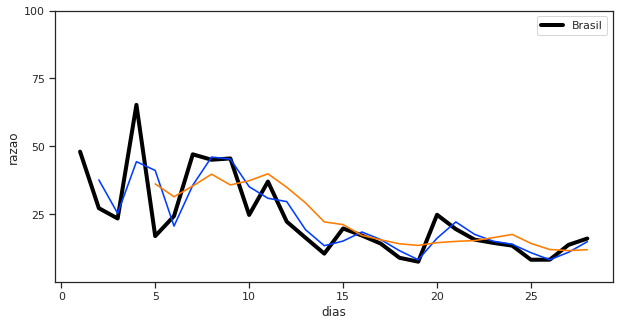

In [61]:
#hide
plt.figure(figsize=(10,5))
plt.yticks([25,50,75,100])
plt.ylim(0,100)
sns.lineplot(x='dias',y='razao',data=brazil,color='black',linewidth=4,label='Brasil')
plt.plot(brazil['razao'].rolling(2).mean(),label= 'MA 2 days')
plt.plot(brazil['razao'].rolling(5).mean(),label= 'MA 5 days')

#plt.savefig("plots/pct_change.png")


<center> <h2> Letalidade </h2> </center>

O gráfco a seguir aponta o número de mortes dividido pelo número de casos confirmados. É importantíssimo notar a grande dependência desses números da quantidade de testes disponíveis. Quanto mais testes realizados, mais confiáveis os dados.

In [0]:
#hide
let_brazil =((mbrazil['Cumulativo'].values[-1]/brazil['Cumulativo'].values[-1])*100).round(2)
let_us = ((mus['Cumulativo'].values[-1]/us['Cumulativo'].values[-1])*100).round(2)
let_uk = ((muk['Cumulativo'].values[-1]/uk['Cumulativo'].values[-1])*100).round(2)
let_italy = ((mitaly['Cumulativo'].values[-1]/italy['Cumulativo'].values[-1])*100).round(2)
let_spain = ((mspain['Cumulativo'].values[-1]/spain['Cumulativo'].values[-1])*100).round(2)
let_japan = ((mjapan['Cumulativo'].values[-1]/japan['Cumulativo'].values[-1])*100).round(2)
let_arg = ((margentina['Cumulativo'].values[-1]/argentina['Cumulativo'].values[-1])*100).round(2)
let_fran = ((mfrance['Cumulativo'].values[-1]/france['Cumulativo'].values[-1])*100).round(2)
let_ind = ((mindia['Cumulativo'].values[-1]/india['Cumulativo'].values[-1])*100).round(2)
let_rc = ((mczech['Cumulativo'].values[-1]/czech_Republic['Cumulativo'].values[-1])*100).round(2)
let_ger = ((mgermany['Cumulativo'].values[-1]/germany['Cumulativo'].values[-1])*100).round(2)
let_ch = ((mchina['Cumulativo'].values[-1]/china['Cumulativo'].values[-1])*100).round(2)


let= [let_brazil,let_us,let_uk,let_italy,let_spain,let_fran,let_japan,let_arg,let_ind,let_ger,let_ch,let_rc]
paises = ['Brasil','EUA', 'Reino Unido','Itália','Espanha','França','Japão','Argentina','Índia','Alemanha','China','República Tcheca']


In [63]:
#hide
letality = pd.DataFrame()
letality['Países'] = paises
letality['Letalidade %'] = let
letality.tail(3)


,Países,Letalidade %
9,Alemanha,1.95
10,China,4.03
11,República Tcheca,1.86


In [64]:
#hide_input

fig = px.bar(letality,x="Letalidade %", y='Países', color='Países',orientation='h',
             color_discrete_sequence=px.colors.qualitative.G10,title="Letalidade - {}".format(today))#.update_yaxes(categoryorder='total dscending')
fig.update_layout(yaxis_type = 'category',)
fig.update_layout(legend= {'title':'País','borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})




In [65]:
#hide
pro_bra = data2[data2['countriesAndTerritories']=='Brazil']
pro_bra['dateRep'] = pd.to_datetime(pro_bra['dateRep'],infer_datetime_format=True)
pro_bra.sort_values('dateRep',inplace=True)

pro_bra['death_cum'] = pro_bra['deaths'].cumsum()
pro_bra['case_cum'] = pro_bra['cases'].cumsum()

pro_bra.drop(['day', 'month','year',"geoId",'countryterritoryCode',"popData2018",'countriesAndTerritories'], axis = 1,inplace=True)
pro_bra.tail(4)

,dateRep,cases,deaths,death_cum,case_cum
1271,2020-04-06,852,54,486,11130
1270,2020-04-07,926,67,553,12056
1269,2020-04-08,1661,114,667,13717
1268,2020-04-09,2210,133,800,15927


In [66]:
#hide
pro_bra['Alemanha'] = pro_bra['death_cum']/let_ger*100
pro_bra = pro_bra[pro_bra['dateRep']>='2020-03-17']
pro_bra = pro_bra[pro_bra['dateRep']<=today]

pro_bra.sort_values('dateRep',ascending=False)
pro_bra.tail(3)

,dateRep,cases,deaths,death_cum,case_cum,Alemanha
1270,2020-04-07,926,67,553,12056,28358.974359
1269,2020-04-08,1661,114,667,13717,34205.128205
1268,2020-04-09,2210,133,800,15927,41025.641026


O gráfico abaixo representa uma estimativa simples da quantidade de casos atualmente no Brasil. Uma vez que a baixa quantidade de testes tem levado os números a uma subnotificação, o cálculo foi realizado com base no número de óbitos registrados por COVID-19 no Brasil e na taxa da Alemanha, país que tem testado massivamente sua população. Desse modo os números são os seguintes:


In [67]:
#hide_input
print("Número atual de casos registrados no Brasil hoje: "+ str(pro_bra.iloc[-1,-3])  )
print("Estimativa de casos no Brasil hoje caso a letalidade seja próxima à da Alemanha: "+ str(int(pro_bra.iloc[-1,-2]))  )
print("Estimativa de casos no Brasil hoje caso a letalidade seja próxima à da Coréia do Sul: "+ str(int(pro_bra.iloc[-1,-1]))  )

Número atual de casos registrados no Brasil hoje: 800
Estimativa de casos no Brasil hoje caso a letalidade seja próxima à da Alemanha: 15927
Estimativa de casos no Brasil hoje caso a letalidade seja próxima à da Coréia do Sul: 41025


In [68]:
#hide
pro_bra.tail(1)

,dateRep,cases,deaths,death_cum,case_cum,Alemanha
1268,2020-04-09,2210,133,800,15927,41025.641026


In [69]:
#hide_input
import plotly.graph_objects as go
pro_bra = pro_bra[pro_bra['dateRep']<=today_us]
fig = go.Figure()
fig.add_trace(go.Scatter(x=pro_bra['dateRep'], y=pro_bra['case_cum'], name='Brasil registrado',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=pro_bra['dateRep'], y=pro_bra['Alemanha'], name='Projeção Alemanha',
                         line=dict(color='blue', width=2)))


fig.update_layout(title='Projeção de casos no Brasil baseados nas taxas de letalidade da Alemanha',
                   xaxis_title='Data',
                   yaxis_title='Projeção')

In [70]:
#hide
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(italy.Cumulativo.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 0.798807
p-value: 0.991617


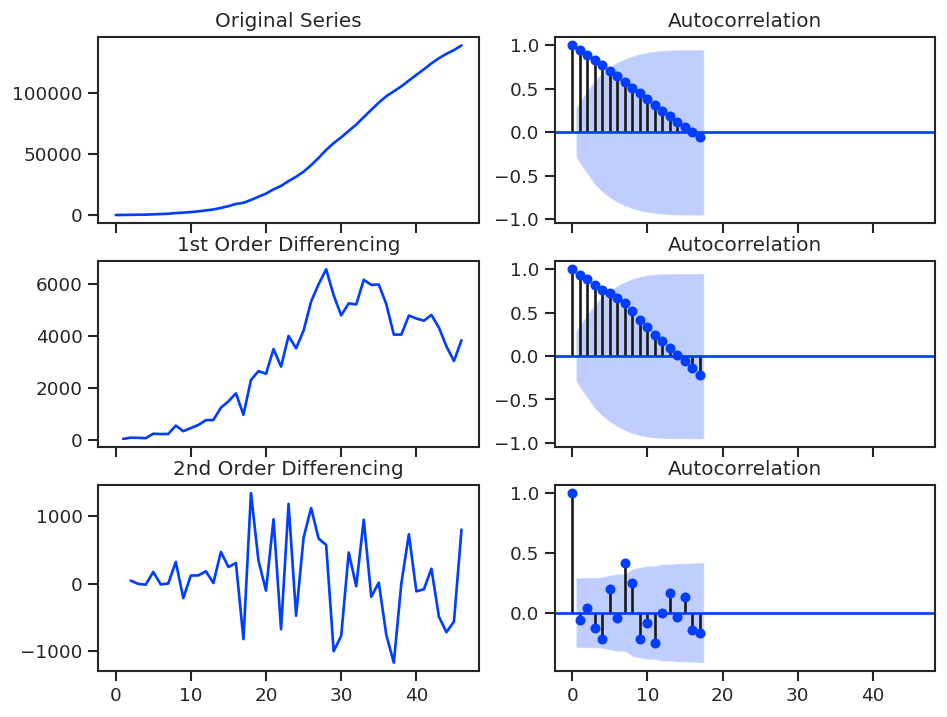

In [71]:
#hide
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df =italy

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(italy.Cumulativo); axes[0, 0].set_title('Original Series')
plot_acf(italy.Cumulativo, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(italy.Cumulativo.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(italy.Cumulativo.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(italy.Cumulativo.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(italy.Cumulativo.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [72]:
#hide
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(italy.Cumulativo.astype(float), order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:           D.Cumulativo   No. Observations:                   46
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -359.238
Method:                       css-mle   S.D. of innovations            579.525
Date:                Thu, 09 Apr 2020   AIC                            728.476
Time:                        12:30:06   BIC                            737.619
Sample:                             1   HQIC                           731.901
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2537.3970   1479.240      1.715      0.094    -361.861    5436.655
ar.L1.D.Cumulativo     0.9510      0.045     20.934      0.000       0.862       1.040
ma.L1.D.Cumulativo  

In [73]:
#hide
# 1,1,1 ARIMA Model
model = ARIMA(italy.Cumulativo.astype(float), order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Cumulativo   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -359.442
Method:                       css-mle   S.D. of innovations            582.383
Date:                Thu, 09 Apr 2020   AIC                            726.883
Time:                        12:30:06   BIC                            734.198
Sample:                             1   HQIC                           729.623
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2453.8062   1564.246      1.569      0.124    -612.059    5519.672
ar.L1.D.Cumulativo     0.9630      0.033     28.835      0.000       0.898       1.028
ma.L1.D.Cumulativo  

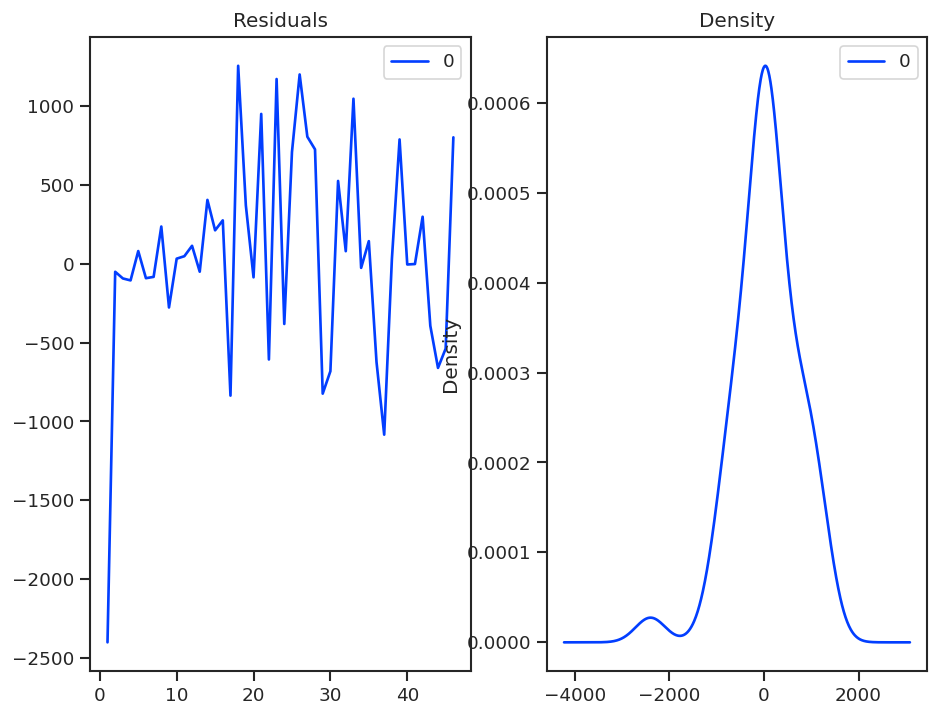

In [74]:
#hide
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

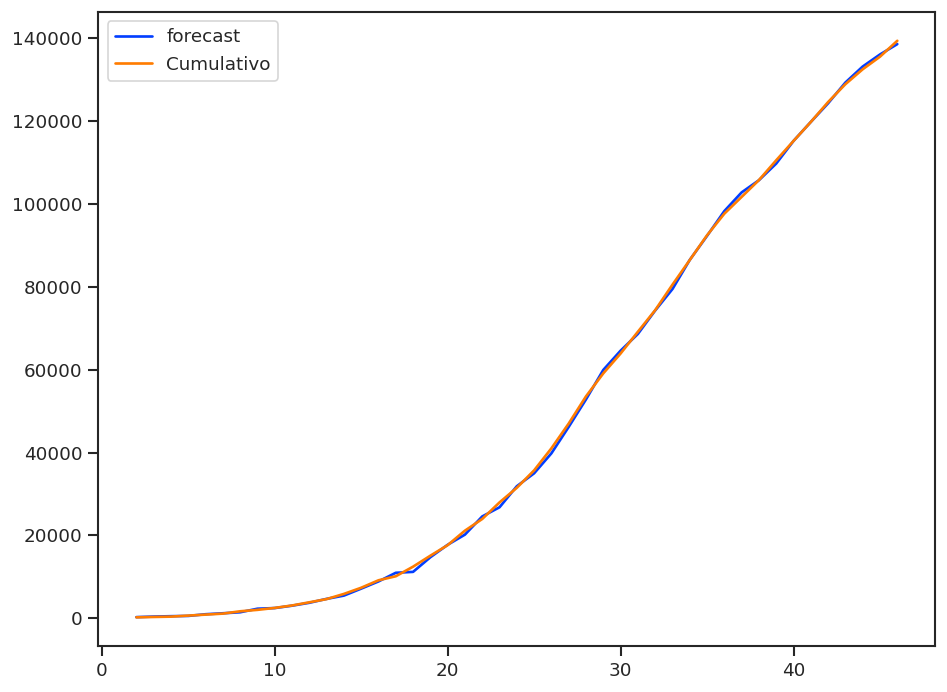

In [75]:
#hide
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [76]:
#hide
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = china.Cumulativo[:20]
test = china.Cumulativo[21:]
print(train)
print(test)

0      59
1      59
2      59
3      59
4      59
5      59
6      59
7      59
8      59
9      59
10     59
11     59
12     63
13     80
14    216
15    235
16    386
17    526
18    623
19    882
Name: Cumulativo, dtype: int64
21     1988
22     2775
23     4528
24     5994
25     7734
      ...  
91    82575
92    82642
93    82698
94    82784
95    82870
Name: Cumulativo, Length: 75, dtype: int64


In [77]:
#hide

!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.6MB/s 


In [0]:
#hide

df = data3[data3['countriesAndTerritories']=='Brazil']

df= df[df['dateRep']>='2020-03-01']
df['cumsum']= df['cases'].cumsum()

df.sort_values('dateRep',ascending=True,inplace=True)
df.index = df['dateRep']



In [0]:
#hide

from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

In [80]:
#hide

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['cumsum'], model='additive')  # model='add' also works
result.plot()

ValueError: ignored

In [0]:
#hide

title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 10
plot_acf(df['cumsum'],title=title,lags=lags);

In [0]:
#hide

stepwise_fit = auto_arima(df['cumsum'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

In [0]:
#hide

len(df)

In [0]:
#hide

train = df.iloc[:30]
test = df.iloc[30:]

In [0]:
#hide

model = ARIMA(train['cumsum'],order=(1,1,1))
results = model.fit()
results.summary()

In [0]:
#hide

# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

In [0]:
#hide

# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['cumsum'][i]}")

In [0]:
#hide

# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = test['cumsum'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


In [0]:
#hide

from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['cumsum'], predictions)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

In [0]:
#hide

from statsmodels.tools.eval_measures import rmse

error = rmse(test['cumsum'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

In [0]:
#hide

model = ARIMA(df['cumsum'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

In [0]:
#hide

# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df['cumsum'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


In [0]:
#hide
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train.astype(float), order=(12, 2, 5))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(5, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
#hide
italy['Shifted'] = x['Cumulativo']

In [0]:
#hide
brasil = list(brazil['Cumulativo'])
x = list(mbrazil['Cumulativo'])
y = list(mbrazil.index)
print(x)
print(y)
print(brasil)

In [0]:
#hide

data2

In [0]:
#hide
data2.sort_values(['dateRep','countriesAndTerritories'],inplace=True)


In [0]:
#hide
data2['dateRep'] = pd.to_datetime(data2['dateRep'],dayfirst=True)


In [0]:
#hide
datax = data2.groupby(['countriesAndTerritories','dateRep']).agg({'deaths': 'sum'})
datax

In [0]:
#hide
datax.reset_index(level=[0,1],inplace=True)
datax

In [0]:
#hide
datax['dateRep'] = datax['dateRep'].dt.strftime('%Y-%m-%d')
datax

In [0]:
#hide
datax.sort_values(['dateRep','countriesAndTerritories'],inplace=True)

In [0]:
#hide
fig = px.bar(datax, x='countriesAndTerritories', y="deaths", color="countriesAndTerritories",
  animation_frame="dateRep", animation_group="countriesAndTerritories", range_y=[0,4000])
fig.show()